1. **Data Preprocessing**:

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Check for missing values
print("Train dataset missing values:\n", train_df.isnull().sum())
print("\nTest dataset missing values:\n", test_df.isnull().sum())

# Handle missing values (e.g., drop rows or impute values)
train_df.dropna(inplace=True)  # Dropping rows with missing values in the train dataset
test_df.dropna(inplace=True)  # Dropping rows with missing values in the test dataset

# Remove irrelevant columns based on the provided description
irrelevant_columns = []  # No irrelevant columns provided in the description
train_df.drop(columns=irrelevant_columns, inplace=True)
test_df.drop(columns=irrelevant_columns, inplace=True)

# Optionally, you can perform additional data cleaning steps here

# Save the cleaned datasets
train_df.to_csv('cleaned_train.csv', index=False)
test_df.to_csv('cleaned_test.csv', index=False)



Train dataset missing values:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Test dataset missing values:
 Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Handling missing values
imputer = SimpleImputer(strategy='median')  # For numerical features
train_df['LotFrontage'] = imputer.fit_transform(train_df[['LotFrontage']])
test_df['LotFrontage'] = imputer.transform(test_df[['LotFrontage']])

imputer = SimpleImputer(strategy='constant', fill_value='None')  # Replace missing values with a default category
train_df[['SaleType']] = imputer.fit_transform(train_df[['SaleType']])
test_df[['SaleType']] = imputer.transform(test_df[['SaleType']])


test_df[['SaleType']] = imputer.transform(test_df[['SaleType']])

# Creating new features
train_df['AgeAtSale'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['AgeAtSale'] = test_df['YrSold'] - test_df['YearBuilt']

# Encoding categorical variables
encoder = OneHotEncoder(drop='first', handle_unknown='ignore') # Drop first category to avoid multicollinearity
cat_columns = ['MSZoning', 'SaleType']  # Categorical columns to encode
train_encoded = pd.DataFrame(encoder.fit_transform(train_df[cat_columns]))
test_encoded = pd.DataFrame(encoder.transform(test_df[cat_columns]))


# Concatenate encoded features with the original dataframes
train_df = pd.concat([train_df, train_encoded], axis=1)
test_df = pd.concat([test_df, test_encoded], axis=1)

# Drop original categorical columns
train_df.drop(columns=cat_columns, inplace=True)
test_df.drop(columns=cat_columns, inplace=True)

# Save the modified datasets
train_df.to_csv('e_train.csv', index=False)
test_df.to_csv('e_test.csv', index=False)


2. **Exploratory Data Analysis (EDA)**:

In [12]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv('e_train.csv')
print(train_df.head())




   Id  MSSubClass  LotFrontage  LotArea Street Alley LotShape LandContour  \
0   1          60         65.0     8450   Pave   NaN      Reg         Lvl   
1   2          20         80.0     9600   Pave   NaN      Reg         Lvl   
2   3          60         68.0    11250   Pave   NaN      IR1         Lvl   
3   4          70         60.0     9550   Pave   NaN      IR1         Lvl   
4   5          60         84.0    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0    AllPub    Inside  ...    NaN   NaN         NaN       0      2   2008   
1    AllPub       FR2  ...    NaN   NaN         NaN       0      5   2007   
2    AllPub    Inside  ...    NaN   NaN         NaN       0      9   2008   
3    AllPub    Corner  ...    NaN   NaN         NaN       0      2   2006   
4    AllPub       FR2  ...    NaN   NaN         NaN       0     12   2008   

   SaleCondition  SalePrice  AgeAtSale                              0  
0 

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
YrSold             int64
SaleCondition     object
SalePrice          int64
AgeAtSale          int64
0                 object
Length: 81, dtype: object


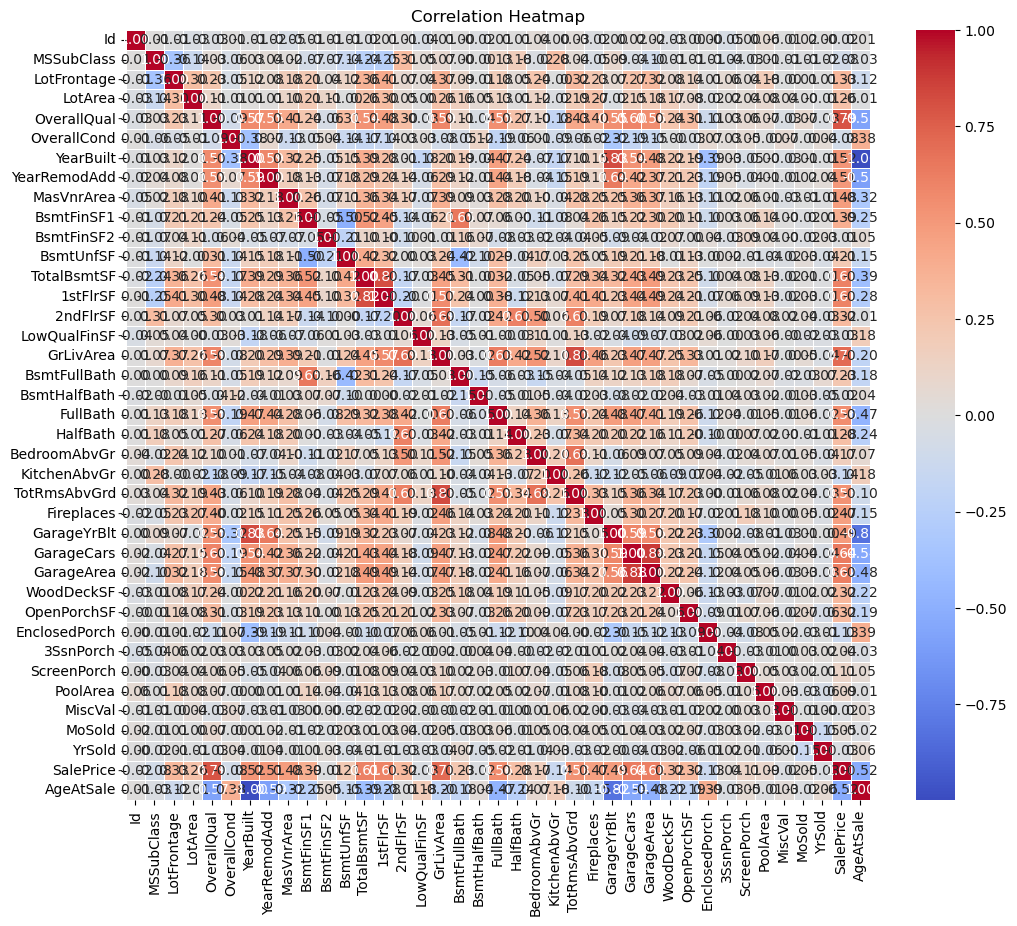

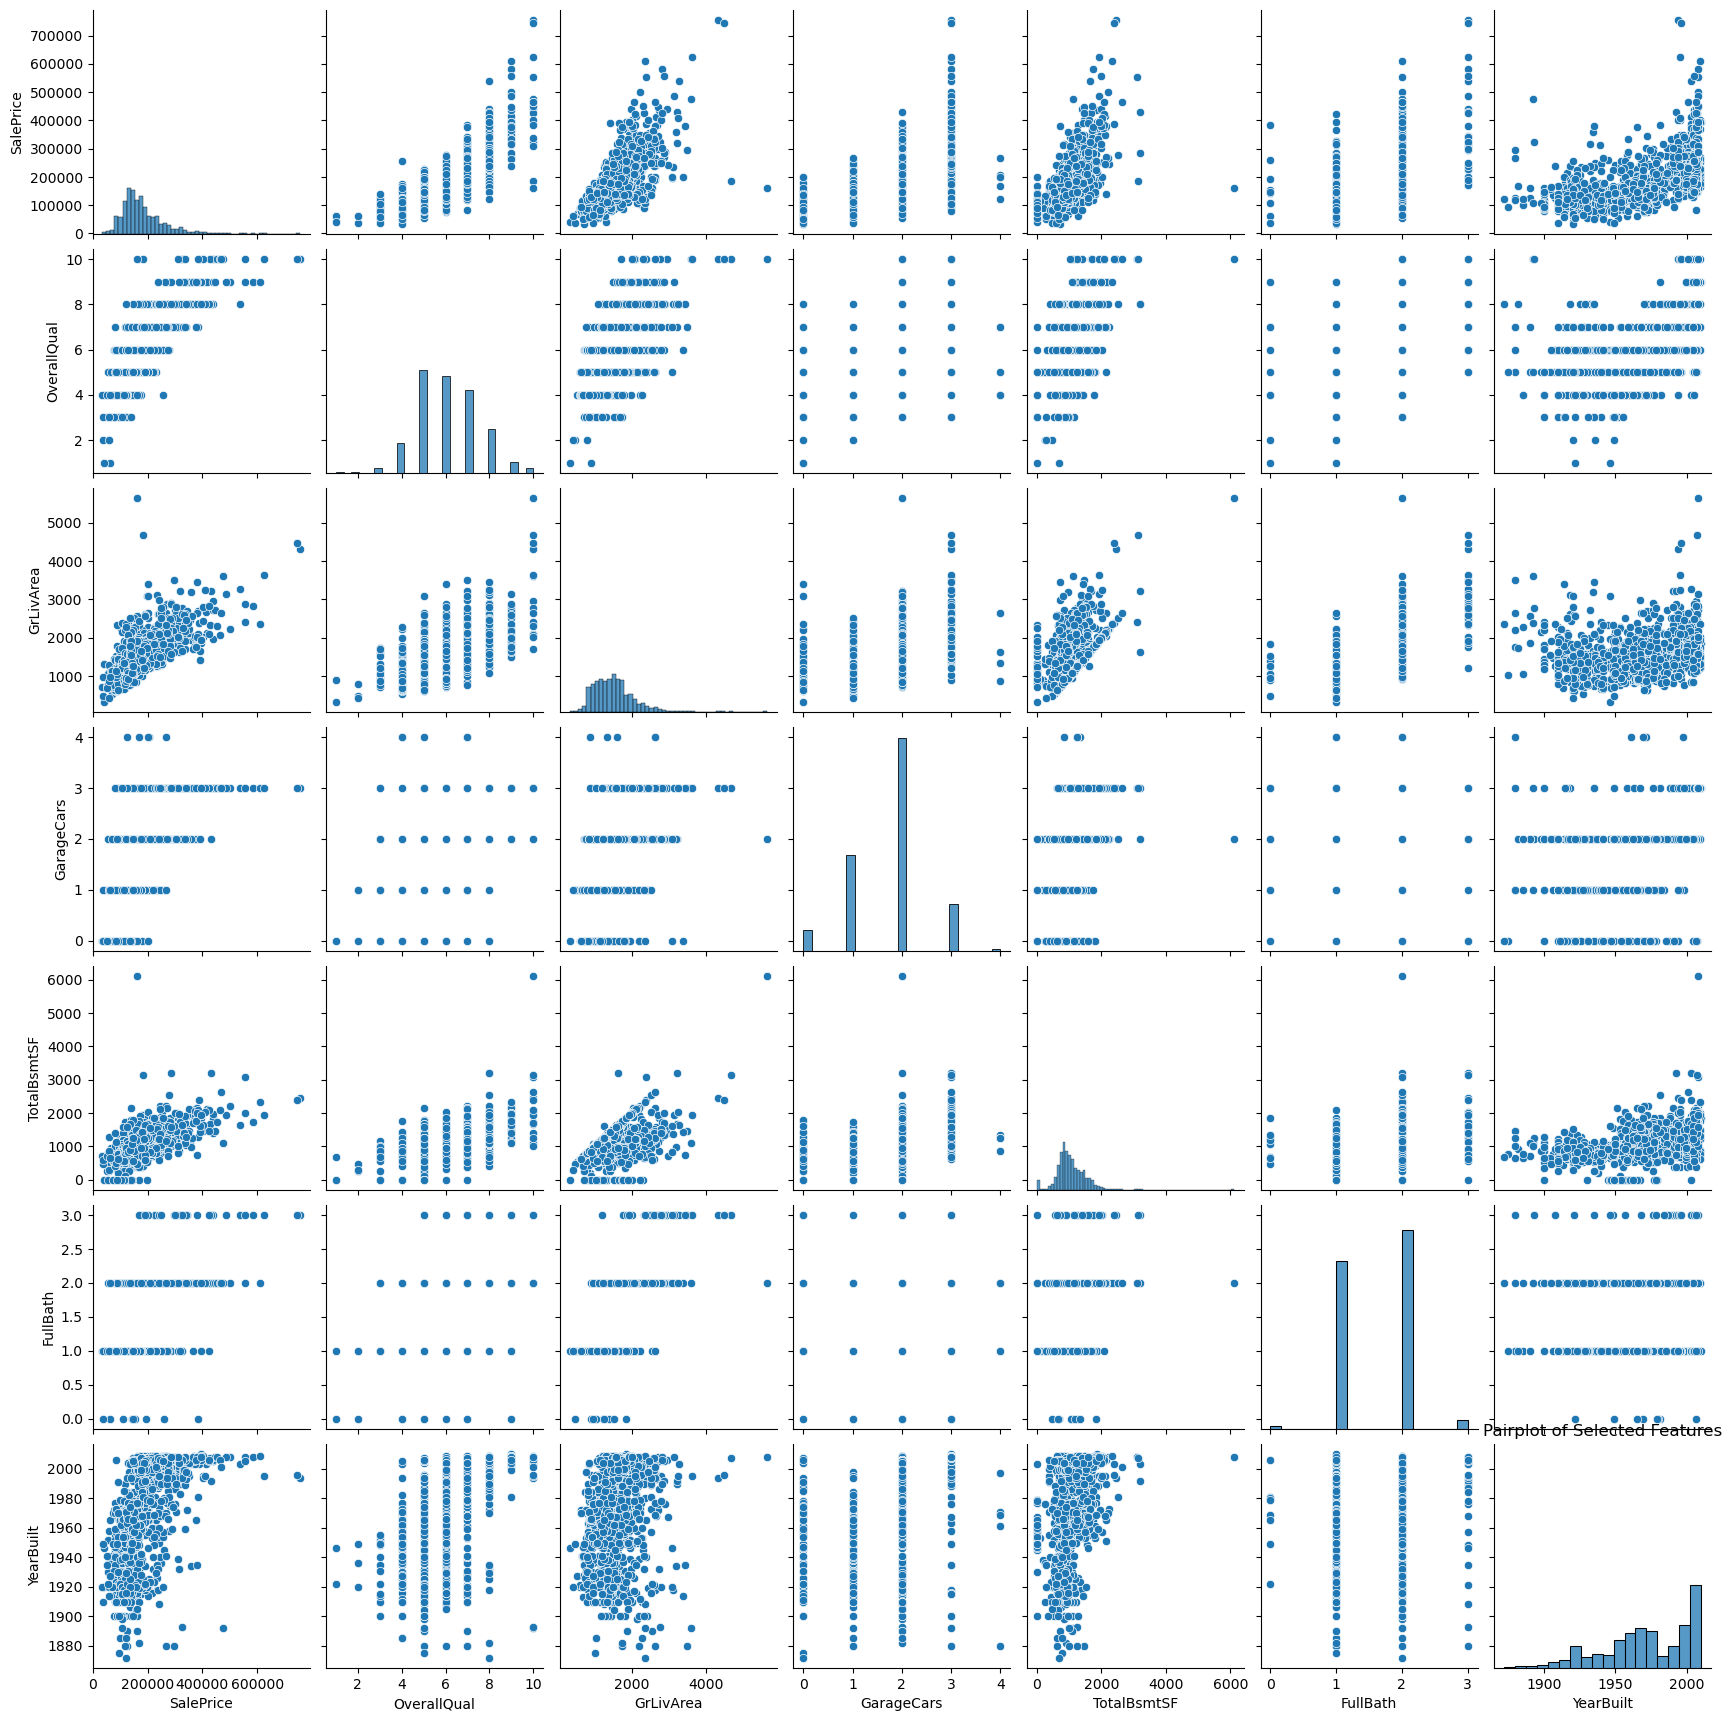

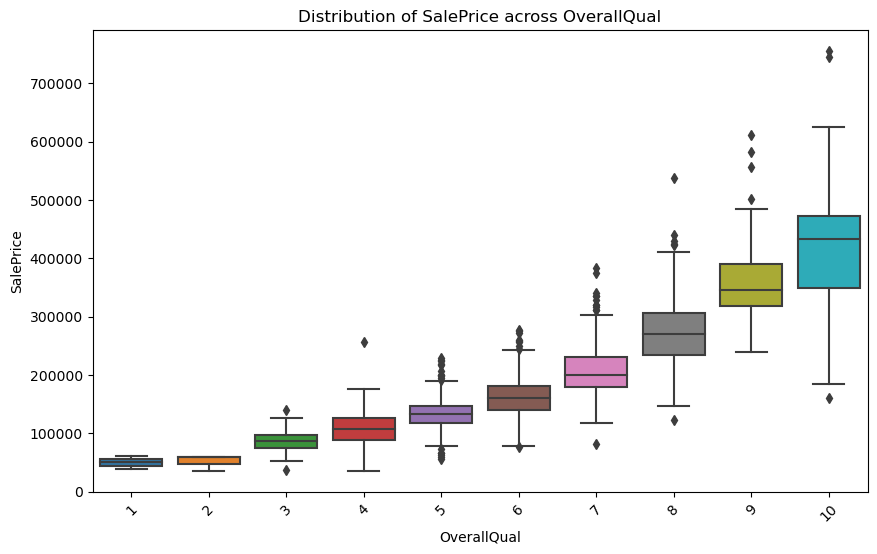

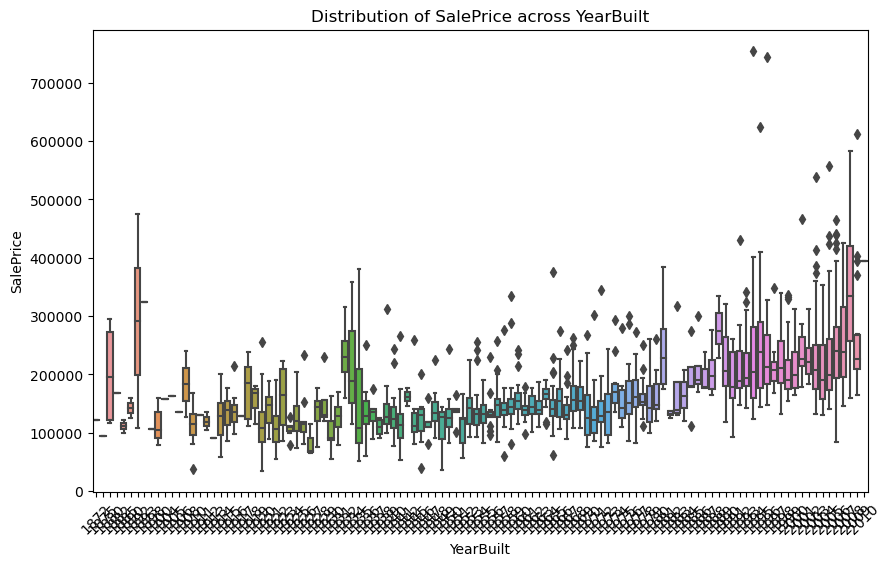

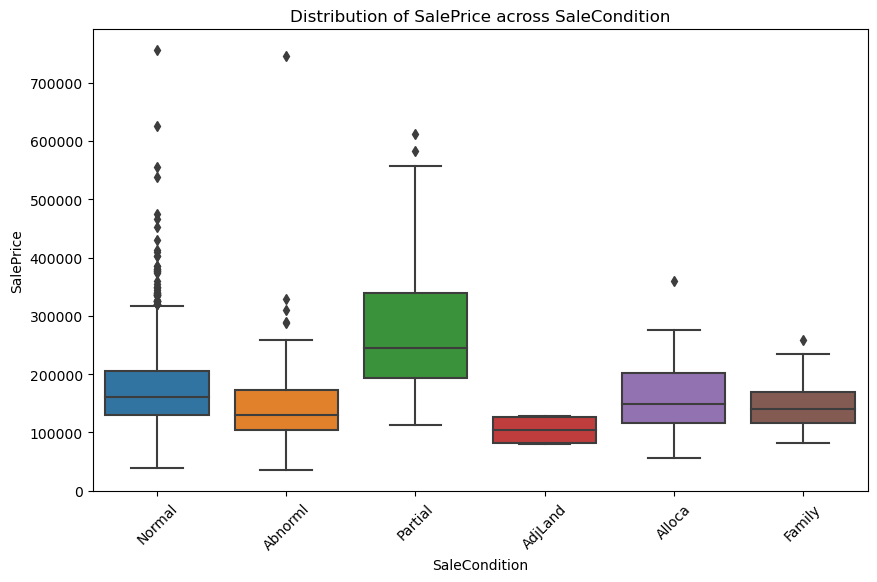

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_df = pd.read_csv('e_train.csv')

# Check the data types of each column
print(train_df.dtypes)

# Calculate correlation matrix
train_df_numeric = train_df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = train_df_numeric.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected features
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[selected_features])
plt.title('Pairplot of Selected Features')
plt.show()

# Boxplot to visualize the distribution of SalePrice across different categorical features
categorical_features = ['OverallQual', 'YearBuilt', 'SaleCondition']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='SalePrice', data=train_df)
    plt.title(f'Distribution of SalePrice across {feature}')
    plt.xticks(rotation=45)
    plt.show()


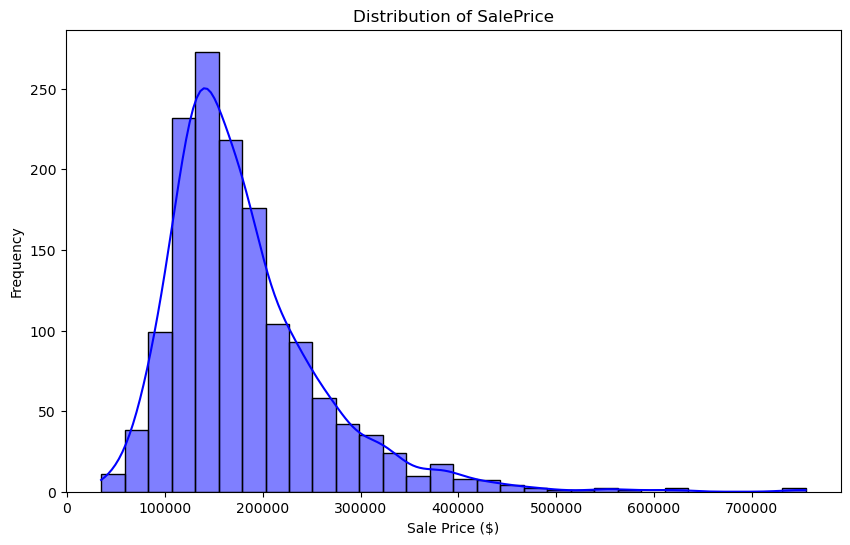

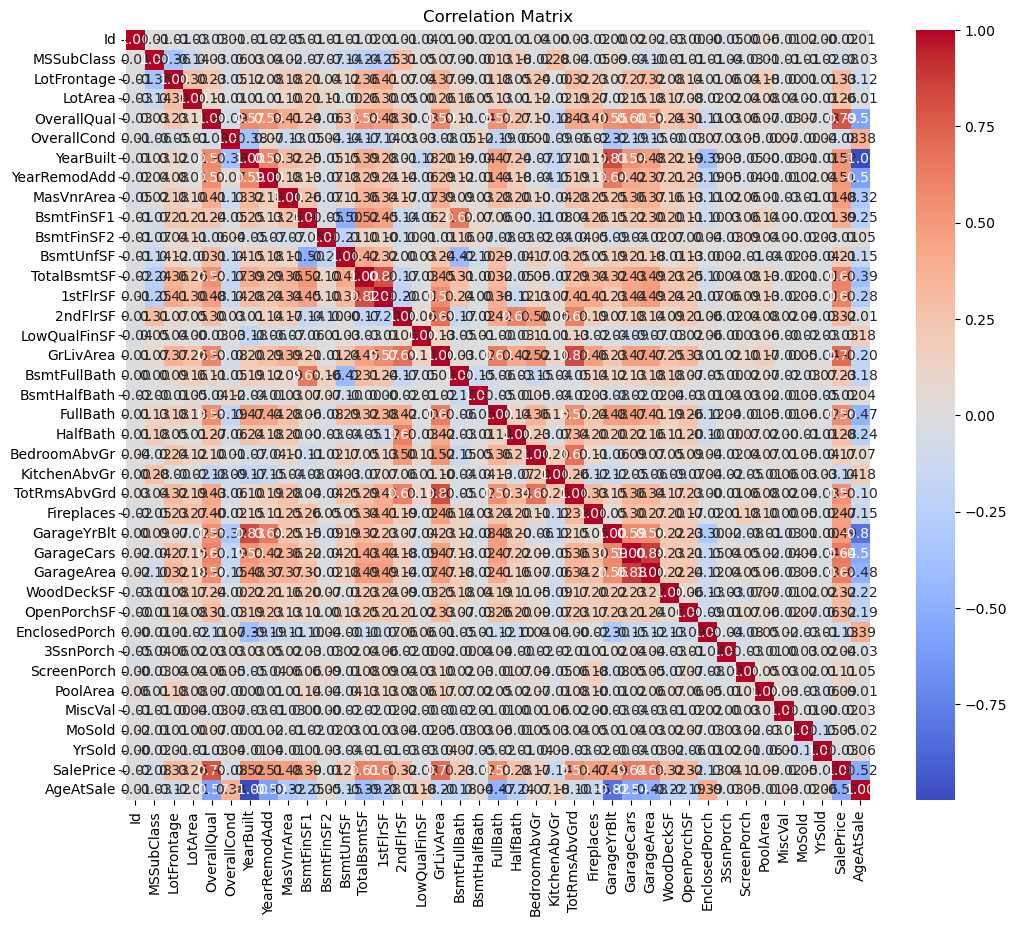

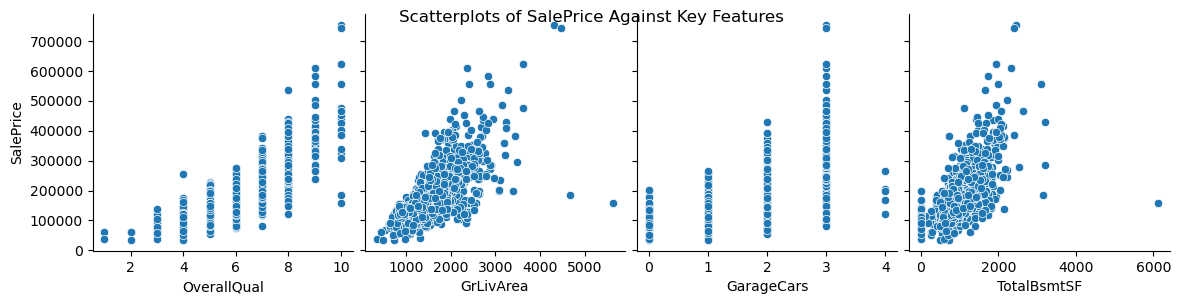

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
e_train_df = pd.read_csv('e_train.csv')

# Visualize the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(e_train_df['SalePrice'], kde=True, color='blue', bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
numeric_df = e_train_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualize relationships between features and the target variable
sns.pairplot(e_train_df, x_vars=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'], y_vars=['SalePrice'], kind='scatter', height=3)
plt.suptitle('Scatterplots of SalePrice Against Key Features')
plt.show()



1. **Correlation Matrix**:
   - A correlation matrix is a square matrix that displays the pairwise correlations between variables. Each cell represents the correlation coefficient (usually Pearson's correlation coefficient) between two features.
   - Positive correlations (closer to 1) indicate that when one feature increases, the other tends to increase as well. Negative correlations (closer to -1) suggest an inverse relationship.
   - The intensity of color (e.g., darker shades) reflects the strength of the correlation.

2. **Interpreting the Matrix**:
   - Look for strong positive or negative correlations. These can guide decision-making in real estate investments or housing development.
   - For example:
     - A strong positive correlation between "Number of Bedrooms" and "Square Footage" might imply that larger houses tend to have more bedrooms.
     - A negative correlation between "Distance to Public Transportation" and "Property Value" could suggest that properties closer to public transport hubs are more valuable.



1. **Regression Task**: Since the target variable ('SalePrice') is continuous, regression algorithms are appropriate for this problem.

2. **Complexity of Relationships**: The insights from the correlation matrix suggest that there may be both linear and nonlinear relationships between features and the target variable. Therefore, algorithms capable of capturing both types of relationships should be considered.

3. **Interpretability**: If interpretability is essential, linear regression could be a good starting point since it provides coefficients that directly indicate the impact of each feature on the target variable.

4. **Performance**: Given the complexity of relationships and the need for predictive accuracy, ensemble methods like Random Forest or Gradient Boosting Machines (GBM) could be effective. These algorithms can capture nonlinear patterns and interactions between features while providing robust predictions.

Random Forest and Gradient Boosting Machines (GBM) stand out as promising choices for predicting 'SalePrice' in this scenario. They can handle both linear and nonlinear relationships, provide robust predictions, and are widely used in regression tasks with similar characteristics.



3. **Model Selection and Training**:

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming X_train, y_train, X_test, y_test are defined

# Define the column names for numerical and categorical data
num_cols = X_train.select_dtypes(include=['number']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Define the transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Define the models and their parameter grids
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Define the parameter grids with the correct naming
param_grids = {
    'Linear Regression': {},
    'Random Forest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20]
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.05, 0.1, 0.2],
        'model__max_depth': [3, 4, 5]
    }
}

# Train and evaluate models
best_models = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

# Evaluate models
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name} RMSE: {rmse}")

Linear Regression RMSE: 31170.276837632875
Random Forest RMSE: 28942.42392687183
Gradient Boosting RMSE: 26780.868557384834


4. **Model Evaluation and Selection**:

In [65]:
# Model Evaluation and Selection

# Given RMSE values for each model
rmse_values = {
    'Linear Regression': 31170.276837632875,
    'Random Forest': 28942.42392687183,
    'Gradient Boosting': 26780.868557384834
}

# Evaluate the models on the testing dataset
print("Model Evaluation on the Testing Dataset:")
for model_name, rmse in rmse_values.items():
    print(f"{model_name} RMSE: {rmse}")

# Select the best-performing model based on RMSE
best_model = min(rmse_values, key=rmse_values.get)
best_rmse = rmse_values[best_model]

# Output the best-performing model
print("\nBest-Performing Model:")
print(f"Model: {best_model}")
print(f"RMSE: {best_rmse}")

Model Evaluation on the Testing Dataset:
Linear Regression RMSE: 31170.276837632875
Random Forest RMSE: 28942.42392687183
Gradient Boosting RMSE: 26780.868557384834

Best-Performing Model:
Model: Gradient Boosting
RMSE: 26780.868557384834


Submission

In [69]:
print(test_df.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeck

In [70]:
# Assuming 'model' is your trained model and 'test_df' is your test DataFrame
# Generate predictions for the test set
predicted_sale_prices = model.predict(test_df)

# Create a submission DataFrame with 'Id' and the predicted 'SalePrice'
submission_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predicted_sale_prices
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)